# Versuch 255 Röntgenspektrometer - Auswertung
#### Felix Fleischle - 3.3.2022

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
#%matplotlib qt5

In [2]:
def comma_to_float(valstr):
    return float(valstr.decode("utf-8").replace(',','.'))

winkel_1, n_1 =np.loadtxt('C:/Users/fexfl\Documents/.Keine Programme Docs/Studium/PAP2/255/03_03_2022 09_50_05.txt', converters= {0:comma_to_float, 1:comma_to_float}, unpack=True)
N_1 = 5 * n_1
N_1_err = np.sqrt(N_1)
n_1_err = N_1_err / 5

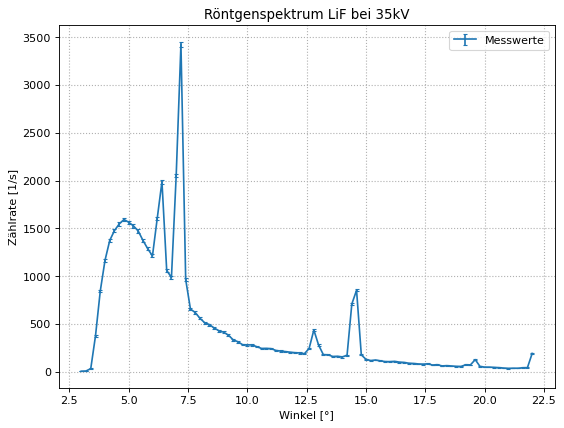

In [3]:
plt.figure(figsize=(8, 6), dpi=80)
plt.errorbar(winkel_1,n_1, n_1_err, label="Messwerte", capsize = 2)
plt.xlabel('Winkel [°]')
plt.ylabel('Zählrate [1/s]')
plt.title('Röntgenspektrum LiF bei 35kV')
plt.legend()
plt.grid(linestyle=":", linewidth=1)

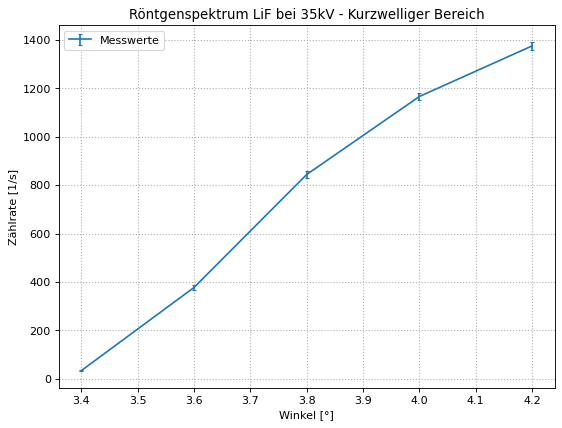

In [4]:
# Wir wählen nur die Messwerte die den senkrechten Anstieg ausmachen:
plt.figure(figsize=(8, 6), dpi=80)
plt.errorbar(winkel_1[2:7],n_1[2:7], n_1_err[2:7], label="Messwerte", capsize = 2)
plt.xlabel('Winkel [°]')
plt.ylabel('Zählrate [1/s]')
plt.title('Röntgenspektrum LiF bei 35kV - Kurzwelliger Bereich')
plt.legend()
plt.grid(linestyle=":", linewidth=1)

In [5]:
def linear(x,s,b):
    return x*s+b

popt_1, pcov_1 = curve_fit(linear, winkel_1[2:7], n_1[2:7], sigma=n_1_err[2:7])

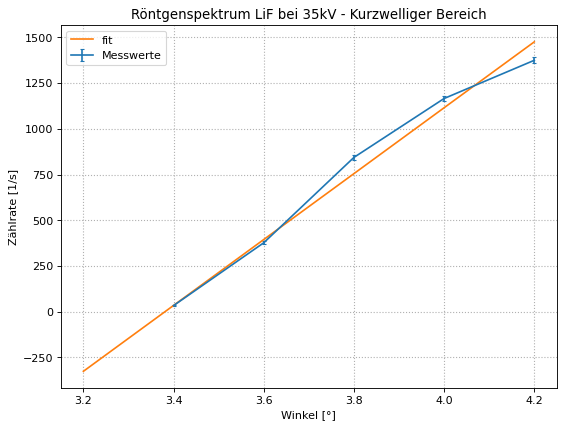

In [6]:
plt.figure(figsize=(8, 6), dpi=80)
plt.errorbar(winkel_1[2:7],n_1[2:7], n_1_err[2:7], label="Messwerte", capsize = 2)
plt.plot(winkel_1[1:7], linear(winkel_1[1:7],*popt_1), label="fit")
plt.xlabel('Winkel [°]')
plt.ylabel('Zählrate [1/s]')
plt.title('Röntgenspektrum LiF bei 35kV - Kurzwelliger Bereich')
plt.legend()
plt.grid(linestyle=":", linewidth=1)

In [7]:
print("Steigung:", popt_1[0], "+-", np.sqrt(pcov_1[0,0]))
print("y-Achsenabschnitt:", popt_1[1], "+-", np.sqrt(pcov_1[1,1]))

x_0 = -popt_1[1]/popt_1[0]
x_0_rad = np.pi/180 * x_0
x_0_err = np.sqrt((np.sqrt(pcov_1[0,0])/popt_1[0])**2 + (np.sqrt(pcov_1[1,1])/popt_1[1])**2) * x_0
x_0_err_rad = np.pi/180 * x_0_err
print("Winkel(0):", x_0, "+-", x_0_err)
print("Winkel(0) in rad:", x_0_rad, "+-", x_0_err_rad)

Steigung: 1801.8509950129942 +- 83.5308826721373
y-Achsenabschnitt: -6091.747075621439 +- 289.3155958554211
Winkel(0): 3.3808273228372627 +- 0.22437814697544106
Winkel(0) in rad: 0.059006568224895514 +- 0.003916137434245203


In [8]:
# Berechnung der Grenzwellenlänge:
d_lif = 201.4 * 10**(-12) #m
lambda_gr1 = 2*d_lif*np.sin(x_0_rad)
lambda_gr1_err = 2*d_lif*np.cos(x_0_rad)*x_0_err_rad
print("Grenzwellenlänge:", lambda_gr1, "+-", lambda_gr1_err)

Grenzwellenlänge: 2.3754055699700432e-11 +- 1.5746748440898482e-12


In [9]:
# Planckkonstante:
c = 299792458 #m/s
e = 1.602176634e-19 #C
U_1 = 35000 #V

h_1 = lambda_gr1 * e * U_1 / c
h_1_err = lambda_gr1_err * e * U_1 / c
print("Planckkonstante:", h_1, "+-", h_1_err)

h_lit = 6.62607015e-34
sigma_h1 = (h_lit - h_1)/h_1_err
print("Abweichung:", sigma_h1)

Planckkonstante: 4.443196350082326e-34 +- 2.9454294493022957e-35
Abweichung: 7.411054440413592


In [10]:
# Grenzwinkel für n=2
x_0_2 = (180/np.pi) *np.arcsin(2*lambda_gr1 /(2*d_lif))
x_0_2_err = 1/np.sqrt(1-(lambda_gr1/d_lif)**2) * (lambda_gr1_err / d_lif) * (180/np.pi)
print("Grenzwinkel 2:", x_0_2, "+-", x_0_2_err)

Grenzwinkel 2: 6.77349820512653 +- 0.4511240560804344


### b) Peaks

In [11]:
winkel_2, n_2 =np.loadtxt('C:/Users/fexfl\Documents/.Keine Programme Docs/Studium/PAP2/255/03_03_2022 10_05_25.txt', converters= {0:comma_to_float, 1:comma_to_float}, unpack=True)
winkel_3, n_3 =np.loadtxt('C:/Users/fexfl\Documents/.Keine Programme Docs/Studium/PAP2/255/03_03_2022 10_16_32.txt', converters= {0:comma_to_float, 1:comma_to_float}, unpack=True)

N_2 = 20 * n_2
N_2_err = np.sqrt(N_2)
n_2_err = N_2_err / 20

N_3 = 20 * n_3
N_3_err = np.sqrt(N_3)
n_3_err = N_3_err / 20

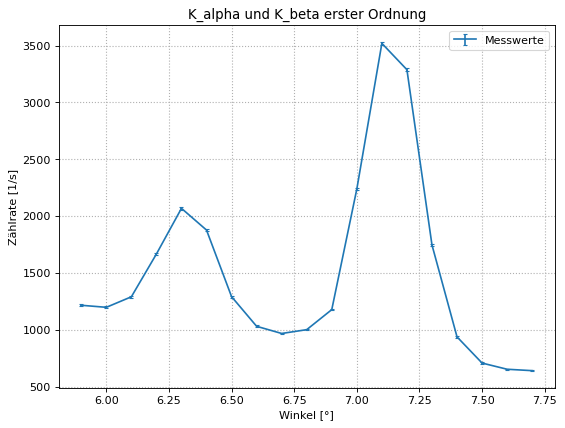

In [12]:
plt.figure(figsize=(8, 6), dpi=80)
plt.errorbar(winkel_2,n_2, n_2_err, label="Messwerte", capsize = 2)
plt.xlabel('Winkel [°]')
plt.ylabel('Zählrate [1/s]')
plt.title('K_alpha und K_beta erster Ordnung')
plt.legend()
plt.grid(linestyle=":", linewidth=1)

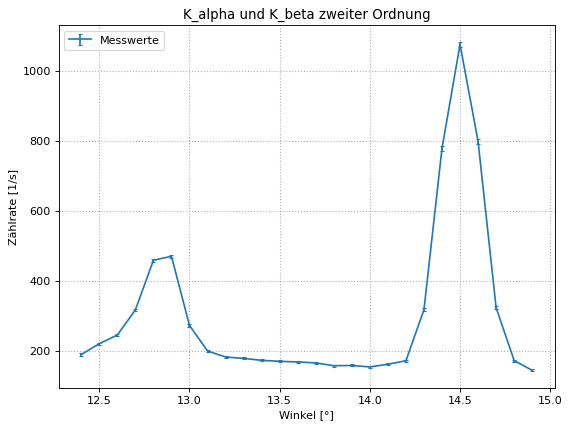

In [13]:
plt.figure(figsize=(8, 6), dpi=80)
plt.errorbar(winkel_3,n_3, n_3_err, label="Messwerte", capsize = 2)
plt.xlabel('Winkel [°]')
plt.ylabel('Zählrate [1/s]')
plt.title('K_alpha und K_beta zweiter Ordnung')
plt.legend()
plt.grid(linestyle=":", linewidth=1)

In [14]:
winkel_k = np.array([6.321, 7.153, 12.852, 14.500]) * (np.pi/180)
winkel_k_err = np.ones(4)*0.020 * (np.pi/180)

n_k = np.array([1,1,2,2])

lambda_k = 2 * d_lif * np.sin(winkel_k) / n_k
lambda_k_err = 2 * d_lif * np.cos(winkel_k) * winkel_k_err / n_k

print("Wellenlängen der K's:", lambda_k, "+-", lambda_k_err)

lambda_alpha = (lambda_k[1] + lambda_k[3]) / 2
lambda_alpha_syserr = np.sqrt((lambda_k_err[1]/2)**2 + (lambda_k_err[3]/2)**2)
lambda_alpha_stderr = np.std([lambda_k[1], lambda_k[3]])/np.sqrt(2)
lambda_alpha_err = np.sqrt(lambda_alpha_syserr**2 + lambda_alpha_stderr**2)
print("Wellenlänge Alpha:", lambda_alpha, "+-", lambda_alpha_err)

lambda_beta = (lambda_k[0] + lambda_k[2]) / 2
lambda_beta_syserr = np.sqrt((lambda_k_err[0]/2)**2 + (lambda_k_err[2]/2)**2)
lambda_beta_stderr = np.std([lambda_k[0], lambda_k[2]])/np.sqrt(2)
lambda_beta_err = np.sqrt(lambda_beta_syserr**2 + lambda_beta_stderr**2)
print("Wellenlänge Beta:", lambda_beta, "+-", lambda_beta_err)

# Abweichungen:
lambda_alpha_lit = 71.1*10**(-12)
lambda_beta_lit = 63.1*10**(-12)
sigma_lambda_alpha = (lambda_alpha_lit - lambda_alpha)/lambda_alpha_err
sigma_lambda_beta = (lambda_beta_lit - lambda_beta)/lambda_beta_err
print("Abweichungen:", sigma_lambda_alpha, sigma_lambda_beta)

Wellenlängen der K's: [4.43477199e-11 5.01563962e-11 4.47980915e-11 5.04265328e-11] +- [1.39748948e-13 1.39509431e-13 6.85406517e-14 6.80625821e-14]
Wellenlänge Alpha: 5.029146452275101e-11 +- 1.2306734373861986e-13
Wellenlänge Beta: 4.4572905709288135e-11 +- 1.7723212628550954e-13
Abweichungen: 169.08251080354663 104.53575589826139


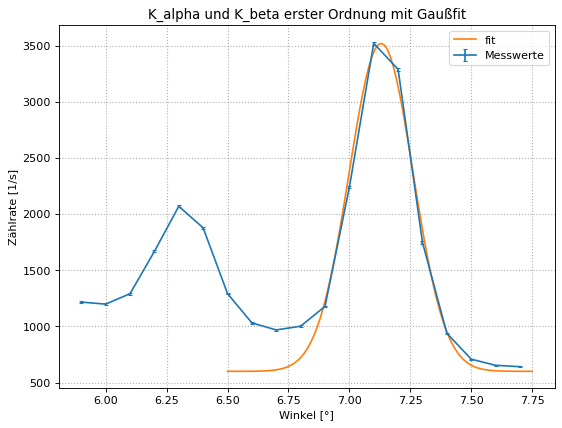

In [15]:
def gauss(x, A, mu, sig):
     return A / (np.sqrt(2 * np.pi) * sig) * np.exp(- (x - mu) ** 2 / (2 * sig ** 2)) + 600
p0 = [500, 7.125, 0.4]
popt_g, pcov_g = curve_fit(gauss, winkel_2[8:], n_2[8:], p0, sigma = n_2_err[8:])

plt.figure(figsize=(8, 6), dpi=80)
plt.errorbar(winkel_2,n_2, n_2_err, label="Messwerte", capsize = 2)
plt.plot(np.linspace(6.5, 7.75, 100), gauss(np.linspace(6.5, 7.75, 100), *popt_g), label="fit")
plt.xlabel('Winkel [°]')
plt.ylabel('Zählrate [1/s]')
plt.title('K_alpha und K_beta erster Ordnung mit Gaußfit')
plt.legend()
plt.grid(linestyle=":", linewidth=1)

In [16]:
beta_halb1 = popt_g[1] - np.sqrt(2 * np.log(2)) * popt_g[2]
beta_halb2 = popt_g[1] + np.sqrt(2 * np.log(2)) * popt_g[2]
print('Winkel beta_1/2 = ', popt_g[1])
print('Winkel beta_halb1 = ', beta_halb1)
print('Winkel beta_halb2 =', beta_halb2)
lambda_halb1 = 2*d_lif*np.sin((np.pi/180)*beta_halb1)
lambda_halb2 = 2*d_lif*np.sin((np.pi/180)*beta_halb2)
print('Halbwertsbreite =', np.abs(lambda_halb2 - lambda_halb1))

Winkel beta_1/2 =  7.1302076302700526
Winkel beta_halb1 =  6.9759835172505555
Winkel beta_halb2 = 7.28443174328955
Halbwertsbreite = 2.1516764675412603e-12


### c) Spannung

In [17]:
# Messdaten:
n_u = np.array([148.2, 186.9, 214.6, 251.6,  282.5, 312.3, 339.7, 378.1, 408.4, 445.4, 476.9, 512.6, 544.1, 591.1, 652.6, 715.3])
U_u = np.linspace(20000, 35000, 16)

N_u = 20 * n_u
N_u_err = np.sqrt(N_u)
n_u_err = N_u_err / 20

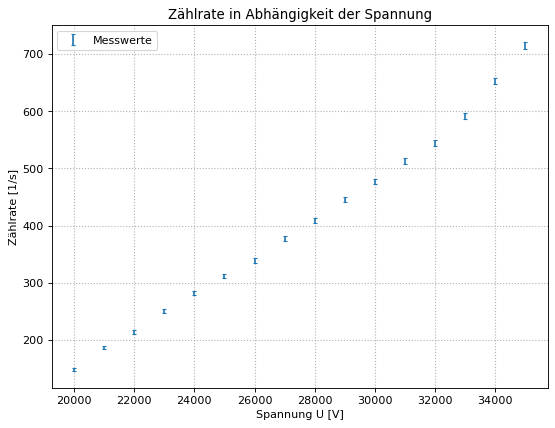

In [18]:
plt.figure(figsize=(8, 6), dpi=80)
plt.errorbar(U_u,n_u, n_u_err, label="Messwerte", capsize = 2, linestyle="none")
plt.xlabel('Spannung U [V]')
plt.ylabel('Zählrate [1/s]')
plt.title('Zählrate in Abhängigkeit der Spannung')
plt.legend()
plt.grid(linestyle=":", linewidth=1)

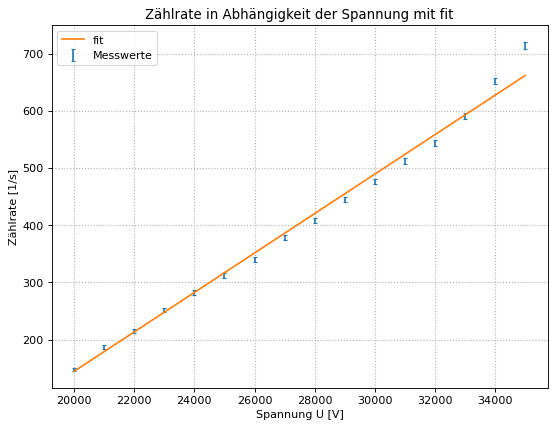

In [19]:
popt_u, pcov_u = curve_fit(linear, U_u, n_u, sigma=n_u_err)

plt.figure(figsize=(8, 6), dpi=80)
plt.errorbar(U_u,n_u, n_u_err, label="Messwerte", capsize = 2, linestyle="none")
plt.plot(U_u, linear(U_u, *popt_u), label="fit")
plt.xlabel('Spannung U [V]')
plt.ylabel('Zählrate [1/s]')
plt.title('Zählrate in Abhängigkeit der Spannung mit fit')
plt.legend()
plt.grid(linestyle=":", linewidth=1)

In [20]:
U_0 = -popt_u[1]/popt_u[0]
U_0_err = np.sqrt((np.sqrt(pcov_u[0,0])/popt_u[0])**2 + (np.sqrt(pcov_u[1,1])/popt_u[1])**2)*U_0
print("Einsatzspannung:", U_0, "+-", U_0_err)

lambda_75 = 2 * d_lif * np.sin((np.pi/180)*7.5)

h_2 = lambda_75 * e * U_0 / c
h_2_err = lambda_75 * e * U_0_err / c
print("Planckkonstante:", h_2, "+-", h_2_err)

sigma_h2 = (h_lit - h_2)/h_2_err
print(sigma_h2)

Einsatzspannung: 15819.292042553667 +- 658.3256057421261
Planckkonstante: 4.444919142420427e-34 +- 1.849769306386944e-35
11.791475834572577


### 2) NaCl

In [21]:
winkel_4, n_4 =np.loadtxt('C:/Users/fexfl\Documents/.Keine Programme Docs/Studium/PAP2/255/03_03_2022 10_42_00.txt', converters= {0:comma_to_float, 1:comma_to_float}, unpack=True)

N_4 = 5 * n_4
N_4_err = np.sqrt(N_4)
n_4_err = N_4_err / 5

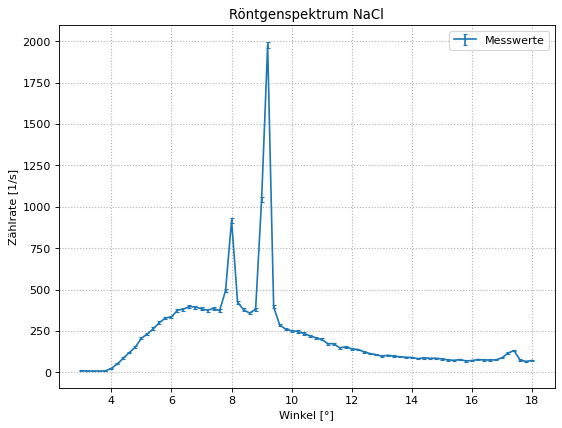

In [22]:
plt.figure(figsize=(8, 6), dpi=80)
plt.errorbar(winkel_4,n_4, n_4_err, label="Messwerte", capsize = 2)
plt.xlabel('Winkel [°]')
plt.ylabel('Zählrate [1/s]')
plt.title('Röntgenspektrum NaCl')
plt.legend()
plt.grid(linestyle=":", linewidth=1)

In [23]:
winkel_nacl_alpha = 9.201 * (np.pi/180)
winkel_nacl_alpha_err = 0.020 * (np.pi/180)
winkel_nacl_beta = 8.002 * (np.pi/180)
winkel_nacl_beta_err = 0.020 * (np.pi/180)

d_nacl_alpha = lambda_alpha / (2*np.sin(winkel_nacl_alpha))
d_nacl_alpha_err = np.sqrt((lambda_alpha_err / (2*np.sin(winkel_nacl_alpha)))**2 + (lambda_alpha / (2*np.sin(winkel_nacl_alpha))**2 * (2*np.cos(winkel_nacl_alpha)*winkel_nacl_alpha_err))**2)

d_nacl_beta = lambda_beta / (2*np.sin(winkel_nacl_beta))
d_nacl_beta_err = np.sqrt((lambda_beta_err / (2*np.sin(winkel_nacl_beta)))**2 + (lambda_beta / (2*np.sin(winkel_nacl_beta))**2 * (2*np.cos(winkel_nacl_beta)*winkel_nacl_beta_err))**2)
print(d_nacl_alpha, d_nacl_alpha_err, d_nacl_beta, d_nacl_beta_err)
d_nacl = (d_nacl_alpha + d_nacl_beta)/2
d_nacl_syserr = np.sqrt((d_nacl_alpha_err/2)**2 + (d_nacl_beta_err/2)**2)
d_nacl_stderr = np.std([d_nacl_alpha, d_nacl_beta])/np.sqrt(2)
d_nacl_err = np.sqrt(d_nacl_syserr**2 + d_nacl_stderr**2)
print("Netzebenenabstand:", d_nacl,"+-", d_nacl_err)

1.5726067099576493e-10 5.127773661853265e-13 1.6009500923739303e-10 7.505060239940396e-13
Netzebenenabstand: 1.5867784011657897e-10 +- 1.1003336486381133e-12


In [24]:
# Avogadrozahl
M_mol = 58.44 #g
rho = 2.164 #g/cm^3
N_A = M_mol / (2 * rho * (d_nacl*100)**3)
N_A_err = M_mol * 3 * d_nacl_err * 100 / (2 * rho * (d_nacl*100)**4)
print("Avogadro:", N_A, "+-", N_A_err)

Avogadro: 3.3796685796944326e+24 +- 7.030779578453983e+22


In [25]:
N_A_lit = 6.02214076e23
sigma_na = (N_A-N_A_lit)/N_A_err
print(sigma_na)

39.50421816957565


In [26]:
# Test: Korrekturfaktor
h_lit = 6.62607015e-34 #Js
korr = h_lit / h_1
print("korrekturfaktor:", korr)

lambda_alpha_korr = korr * lambda_alpha
lambda_beta_korr = korr * lambda_beta
lambda_alpha_korr_err = korr * lambda_alpha_err
lambda_beta_korr_err = korr * lambda_beta_err
sigma_alpha_korr = np.abs((lambda_alpha_lit - lambda_alpha_korr)/lambda_alpha_korr_err)
sigma_beta_korr = np.abs((lambda_beta_lit - lambda_beta_korr)/lambda_beta_korr_err)
print("Korrigiert Alpha:", lambda_alpha_korr, "+-", lambda_alpha_korr_err)
print("Korrigiert Beta:", lambda_beta_korr, "+-", lambda_beta_korr_err)
print("Abweichungen:", sigma_alpha_korr, sigma_beta_korr)

h_2_korr = korr*h_2
h_2_korr_err = korr*h_2_err
print("Planck 2:", h_2_korr, "+-", h_2_korr_err)
sigma_h_2_korr = np.abs((h_lit - h_2_korr)/h_2_korr_err)
print("Abweichung:", sigma_h_2_korr)

N_A_korr = korr * N_A
print(N_A_korr)

korrekturfaktor: 1.4912845681189013
Korrigiert Alpha: 7.499888495087778e-11 +- 1.835284305567881e-13
Korrigiert Beta: 6.647088644048027e-11 +- 2.643035349044807e-13
Abweichungen: 21.24403798936963 12.75384546672261
Planck 2: 6.628639323627884e-34 +- 2.758532421194853e-35
Abweichung: 0.009313552409767493
5.040047598254632e+24
